In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import ListedColormap


from os import listdir
from skimage import io




>> # Exploration

In [21]:
data_path = "C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regular_ps50_idx5/"
data = listdir(data_path)
len(data)

279

Donc dans le dossier 'IDC_regular_ps50_idx5', on a 279 sous-dossiers.

In [22]:
file_path = "C:/Users/hp/Documents/MSD/PFA/Dataset"
file = listdir(file_path)
len(file)

280

Donc dans le dossier 'Dataset', on a 280 sous-dossiers.

In [23]:
patient_file_path = "C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regular_ps50_idx5/15903"
patient_file = listdir(patient_file_path)
len(patient_file)

2

In [24]:
total_images = 0
for n in range(len(data)):
    patient_id = data[n]
    for c in [0, 1]:
        patient_path = data_path + patient_id 
        class_path = patient_path + "/" + str(c) + "/"
        subfiles = listdir(class_path)
        total_images += len(subfiles)

In [25]:
total_images

277524

In [10]:
patient_file

['0', '1']

Donc chaque dossier (qui représente une patiente), on a deux sous-dossiers nommés 1 et 0.
- Dossier 0 : IDC(-)
- Dossier 1 : IDC(+)

In [11]:
zero = listdir('C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regular_ps50_idx5/15903/0')
one = listdir('C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regular_ps50_idx5/15903/1')

## Conclusion :
1. Notre dataset contient plusieurs dossiers : chacun est nommé selon l'id de la patiente. 
2. Toutes les patientes souffrent du cancer du sein. On a 2 sous-dossiers :
    - 1 : Contient des images des zones contenant les cellules cancereuses, repérées par les coordonnées x et y.
    - 2 : Contient des images des zones contenant les cellules non cancereuses (zones saines).
> Donc chaque patiente a un ensemble de patchs qui ont été extraits.
3. On a un total de 280 patientes.
4. On a 277524 images au total.

In [26]:
class_0_total = 0
class_1_total = 0

In [27]:
for patient_id in data:
    class_0_files = listdir(data_path + patient_id + '/0')
    class_1_files = listdir(data_path + patient_id + '/1')

    class_0_total += len(class_0_files)
    class_1_total += len(class_1_files) 

total_images = class_0_total + class_1_total
    
print(f'Number of patches in Class 0: {class_0_total}')
print(f'Number of patches in Class 1: {class_1_total}')
print(f'Total number of patches: {total_images}')

Number of patches in Class 0: 198738
Number of patches in Class 1: 78786
Total number of patches: 277524


Notre dataset n'est pas balancé.

In [28]:
columns = ["patient_id",'x','y',"target","path"]
data_rows = []
i = 0
iss = 0
isss = 0

# note that we loop through the classes after looping through the 
# patient ids so that we avoid splitting our data into [all class 0 then all class 1]
for patient_id in data:
    for c in [0,1]:
        class_path = data_path + patient_id + '/' + str(c) + '/'
        imgs = listdir(class_path)
        
        # Extracting Image Paths
        img_paths = [class_path + img + '/' for img in imgs]
        
        # Extracting Image Coordinates
        img_coords = [img.split('_',4)[2:4] for img in imgs]
        x_coords = [int(coords[0][1:]) for coords in img_coords]
        y_coords = [int(coords[1][1:]) for coords in img_coords]

        for (path,x,y) in zip(img_paths,x_coords,y_coords):
            values = [patient_id,x,y,c,path]
            data_rows.append({k:v for (k,v) in zip(columns,values)})

In [43]:
# We create a new dataframe using the list of dicts that we generated above
df = pd.DataFrame(data_rows)
print(data.shape)
df

(277524, 5)


,patient_id,x,y,target,path
0,10253,1001,1001,0,C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regu...
1,10253,1001,1051,0,C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regu...
2,10253,1001,1101,0,C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regu...
3,10253,1001,1151,0,C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regu...
4,10253,1001,1201,0,C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regu...
...,...,...,...,...,...
277519,9383,2051,901,1,C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regu...
277520,9383,2051,951,1,C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regu...
277521,9383,2101,1001,1,C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regu...
277522,9383,2101,901,1,C:/Users/hp/Documents/MSD/PFA/Dataset/IDC_regu...


>> # Visualisation 

In [44]:
#default theme
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


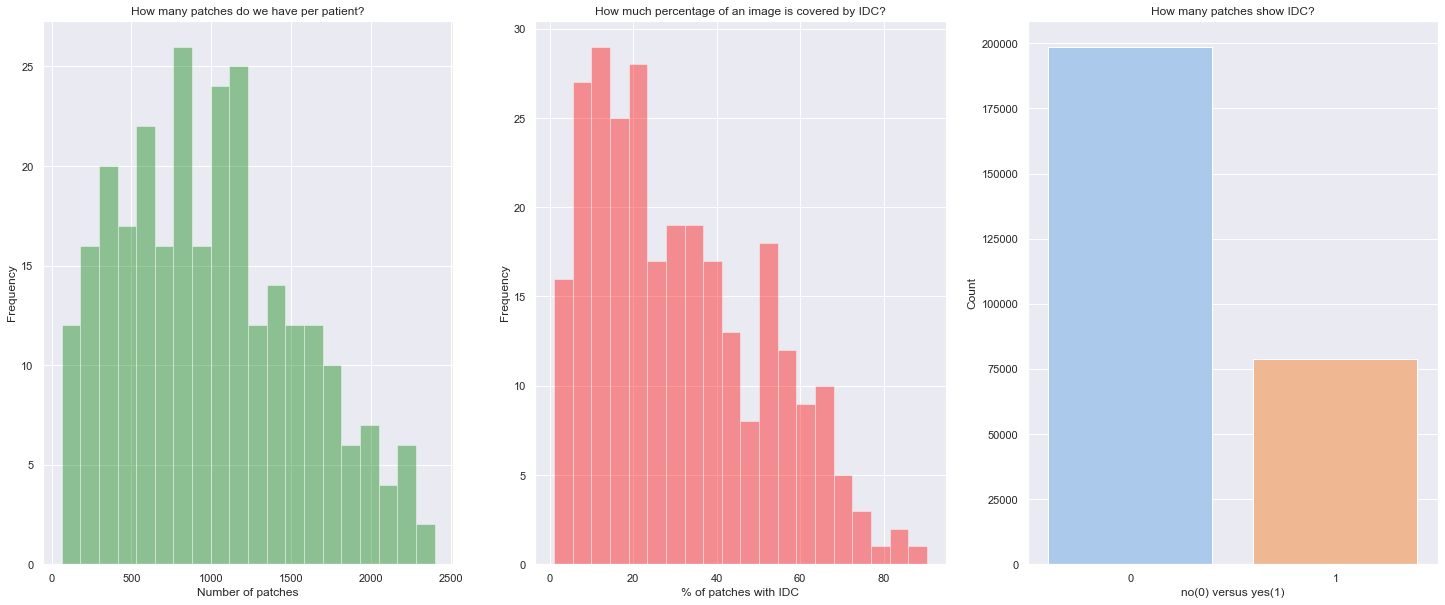

In [47]:
cancer_perc = df.groupby("patient_id").target.value_counts()/ df.groupby("patient_id").target.size()
cancer_perc = cancer_perc.unstack()

fig, ax = plt.subplots(1,3,figsize=(25,10))

# Plotting Frequency of Patches per Patient
sns.distplot(data.groupby("patient_id").size(), ax=ax[0], color="green", kde=False, bins=20)
ax[0].set_xlabel("Number of patches")
ax[0].set_ylabel("Frequency")
ax[0].set_title("How many patches do we have per patient?")

# Plotting Percentage of an image that is covered by Invasive Ductile Carcinoma
sns.distplot(cancer_perc.loc[:, 1]*100, ax=ax[1], color="red", kde=False, bins=20)
ax[1].set_title("How much percentage of an image is covered by IDC?")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("% of patches with IDC")

# Plotting number of patches that show IDC
sns.countplot(df.target, palette='pastel', ax=ax[2]);
ax[2].set_ylabel("Count")
ax[2].set_xlabel("no(0) versus yes(1)")
ax[2].set_title("How many patches show IDC?");

FIG1 : Le nombre de patchs d'images par patient varie. Cela conduit à se demander si toutes les images montrent la même résolution des cellules tissulaires ou si cela varie entre les patients.
FIG2 : Cette figure représente le % des patchs avec IDC (affecté).
FIG3 : Notre dataset n'est pas balancé.

In [46]:
positive_tissue = np.random.choice(data[df.target==1].index.values, size=100, replace=False)
negative_tissue = np.random.choice(data[df.target==0].index.values, size=100, replace=False)

In [48]:
n_rows = 5
n_cols = 5

### Cancerous Patches

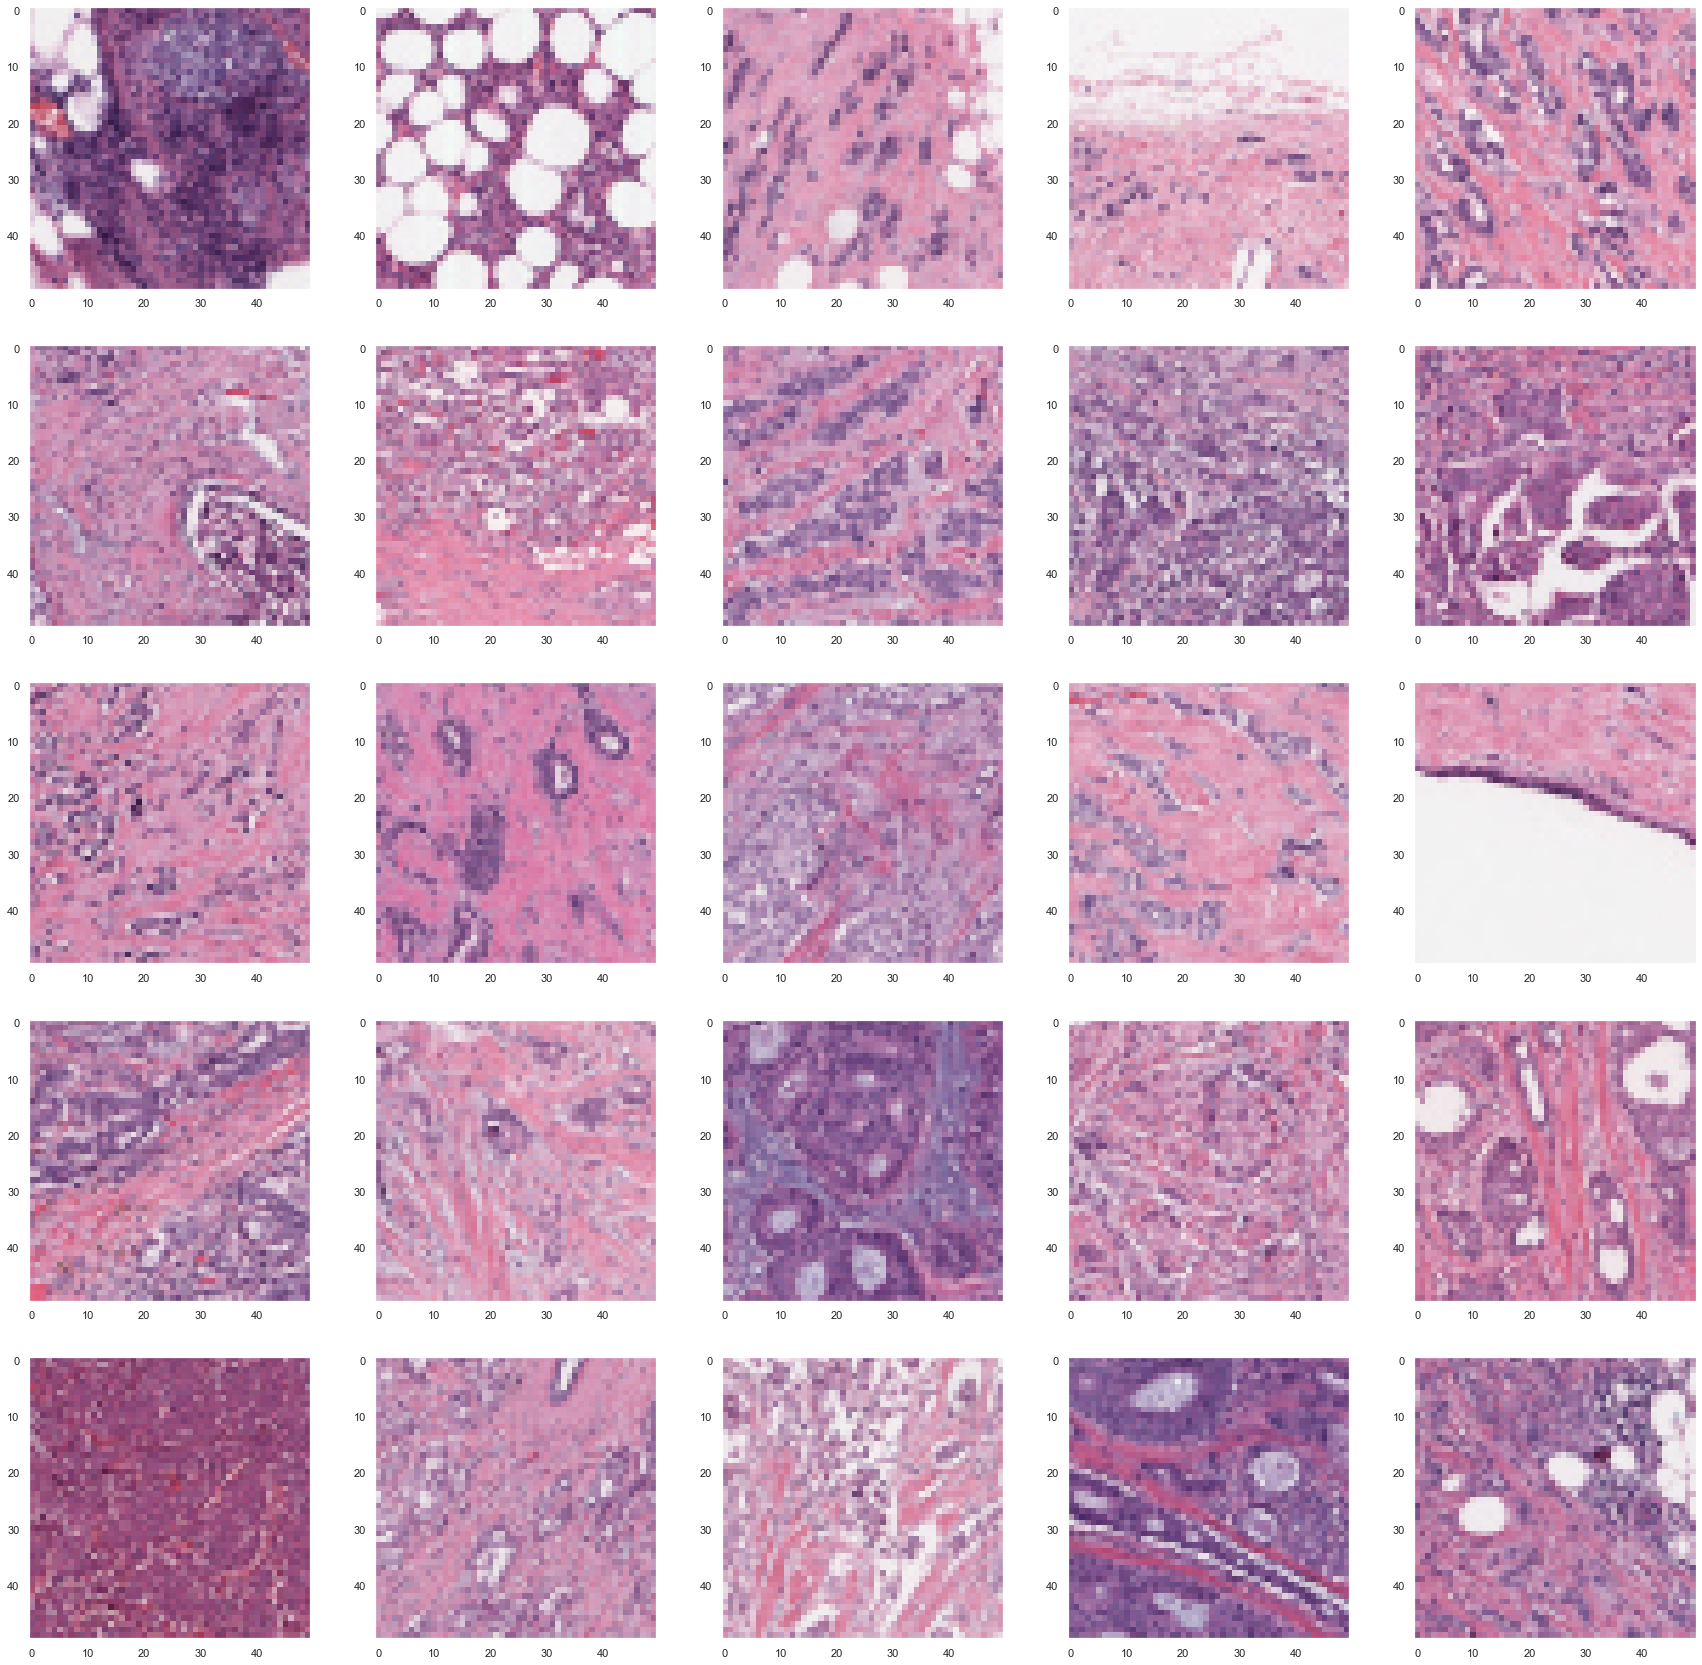

In [51]:
fig,ax = plt.subplots(n_rows,n_cols,figsize = (30,30))

for row in range(n_rows):
    for col in range(n_cols):
        # below is a counter to cycle through the image indexes
        idx = positive_tissue[col + n_cols*row]
        img = io.imread(data.loc[idx, "path"])
        ax[row,col].imshow(img[:,:,:])
        ax[row,col].grid(False)

### Non-Cancerous Patches

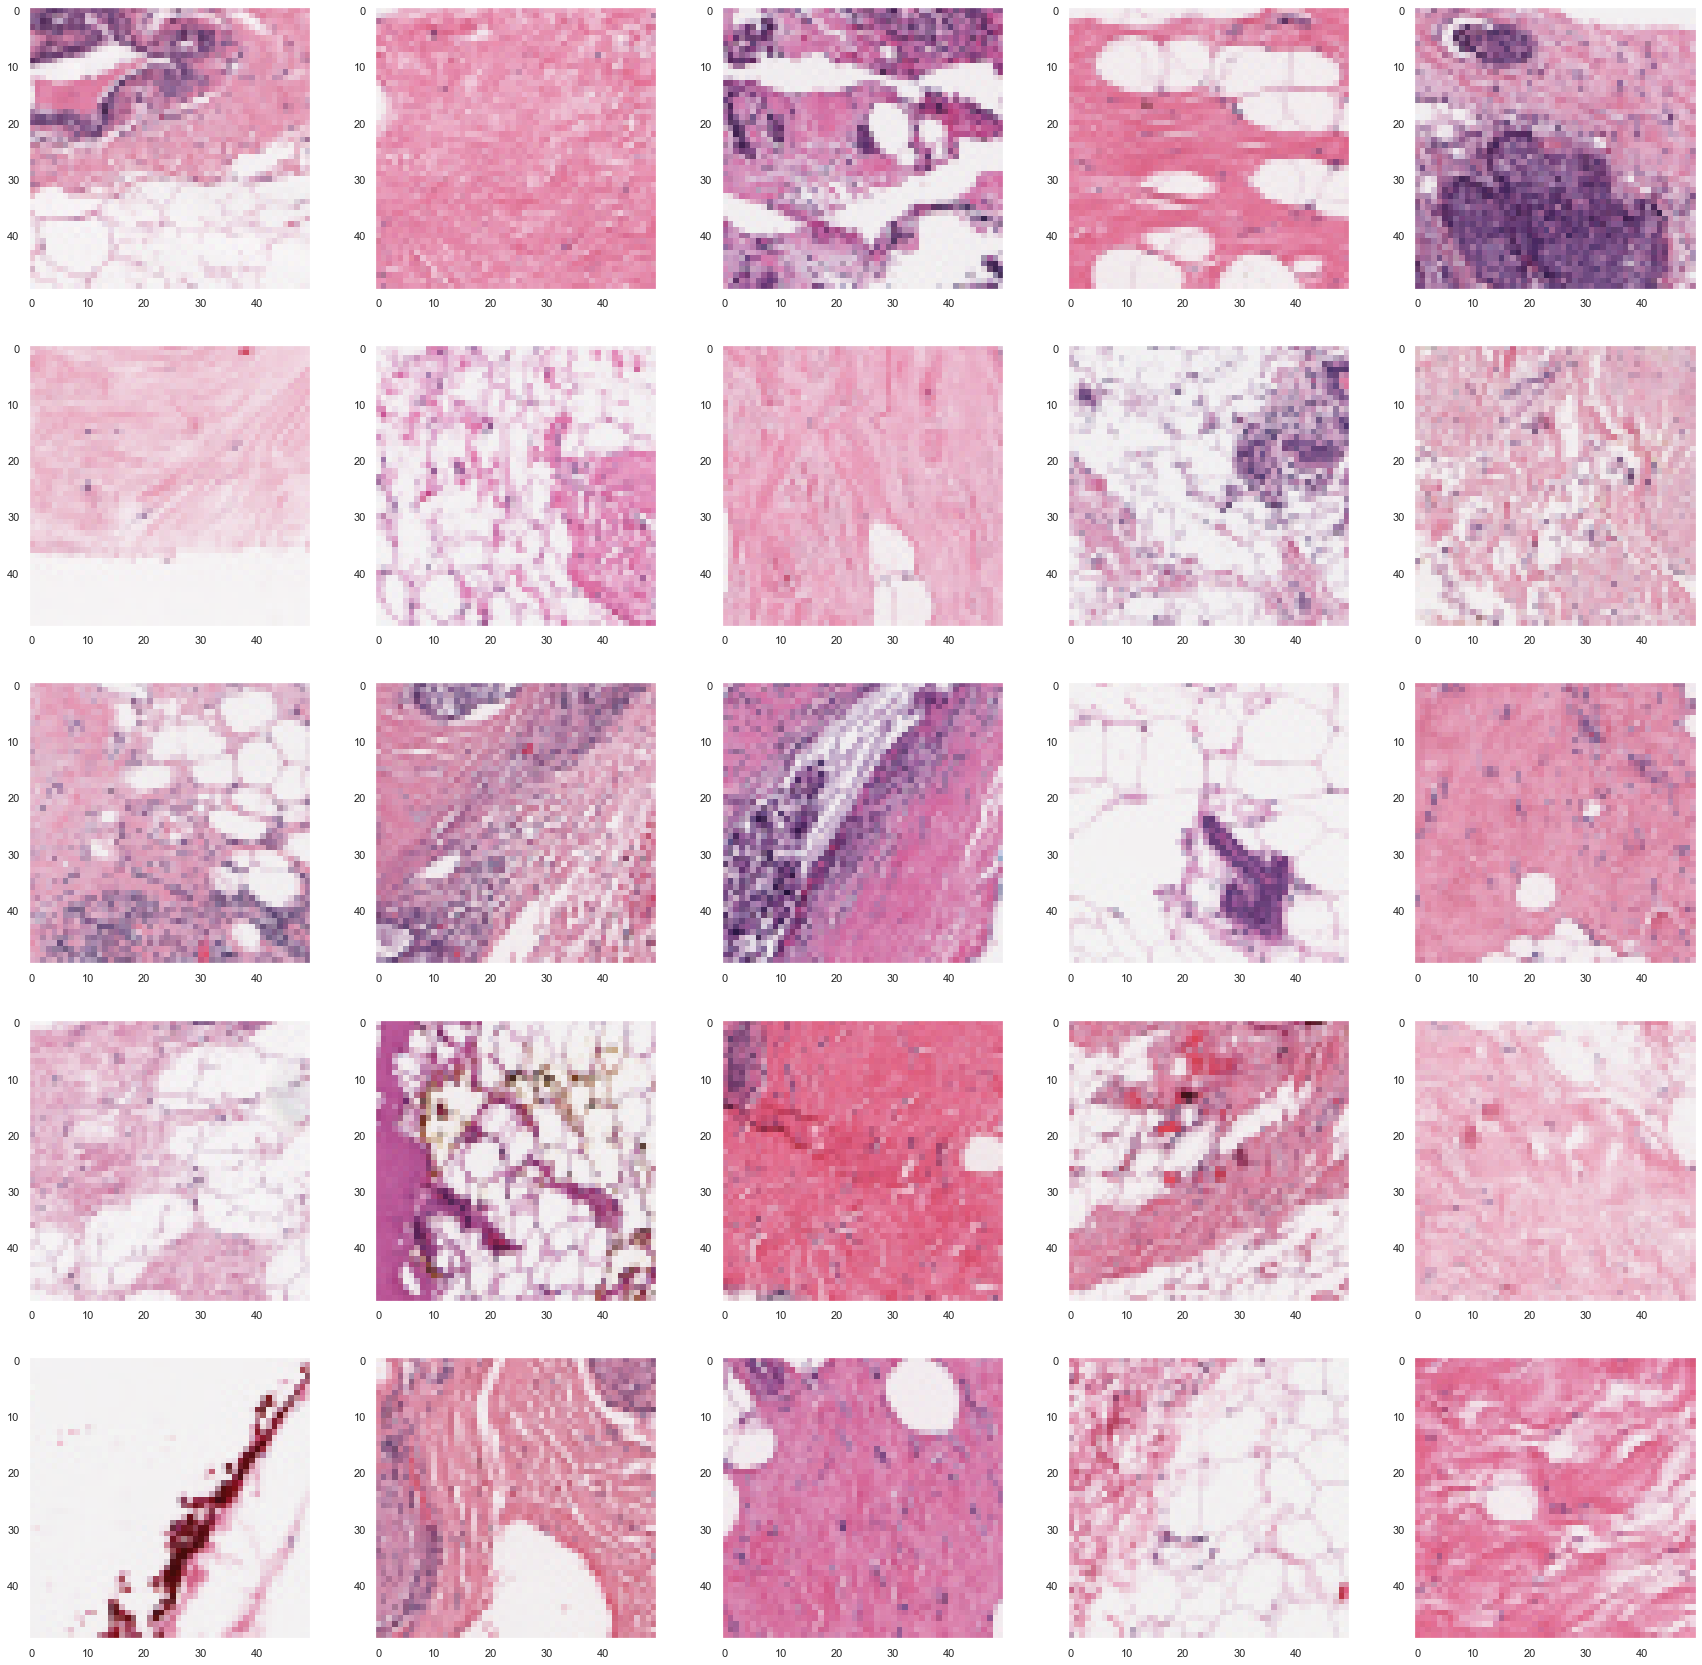

In [52]:
fig,ax = plt.subplots(n_rows,n_cols,figsize = (30,30))

for row in range(n_rows):
    for col in range(n_cols):
        # below is a counter to cycle through the image indices
        idx = negative_tissue[col + n_cols*row]
        img = io.imread(data.loc[idx, "path"])
        ax[row,col].imshow(img[:,:,:])
        ax[row,col].grid(False)

- Les patchs positifs sont plus violets que veux négatifs.

In [54]:
def get_patient_df(patient_id):
    return data.loc[df['patient_id']== patient_id,:]

In [55]:
n_rows = 5
n_cols = 3
n_imgs = n_rows*n_cols

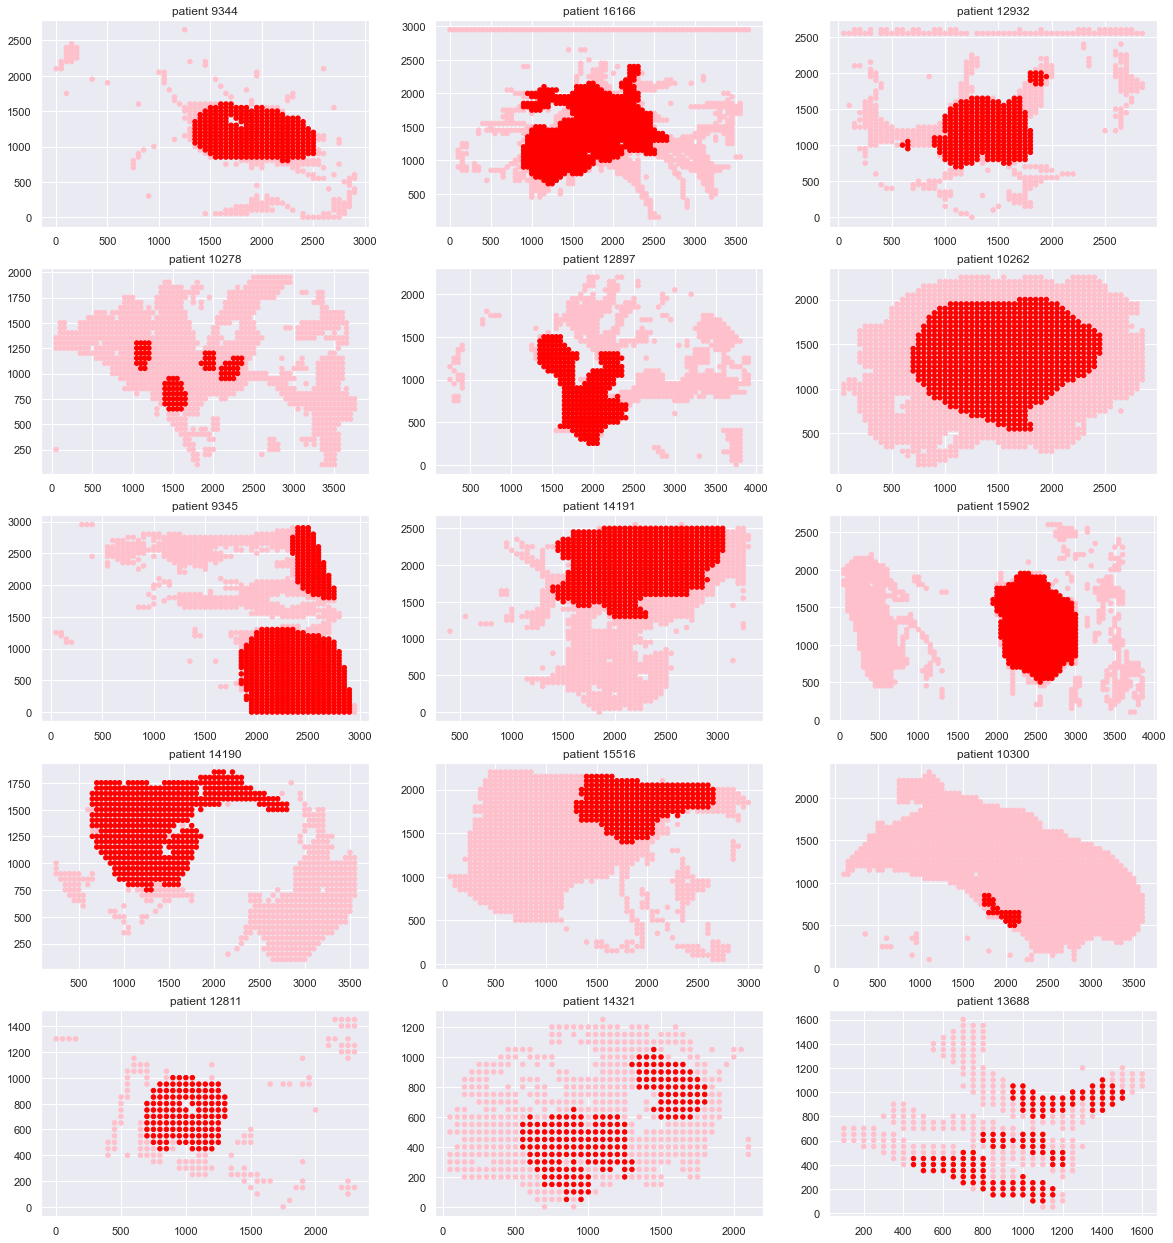

In [58]:
colors = ['pink', 'red']

fig, ax = plt.subplots(n_rows,n_cols,figsize=(20, 22))

patient_ids = np.random.choice( data.patient_id.unique(), size=n_imgs, replace=False)

for row in range(n_rows):
    for col in range(n_cols):
        patient_id = patient_ids[col + n_cols*row]
        patient_df = get_patient_df(patient_id)
        
        ax[row,col].scatter(patient_df.x.values, \
                            patient_df.y.values, \
                            c=patient_df.target.values,\
                            cmap=ListedColormap(colors), s=20)
        ax[row,col].set_title("patient " + patient_id)

Les tissus cancéreux ont tendance à apparaître en clusters plutôt que d'être dispersés partout.

In [65]:
def visualise_breast_tissue(patient_id, df = data,pred = False, crop_dimension = [50,50]):
    # Plotting Settings
    plt.xticks([])
    plt.yticks([])
    # Get patient dataframe
    p_df = get_patient_df(patient_id)
    # Get the dimensions of the breast tissue image
    max_coord = np.max((*p_df.x,*p_df.y))
    # Allocate an array to fill image pixels in,use uint8 type as you don't need an int over 255
    grid = 255*np.ones(shape = (max_coord + crop_dimension[0], max_coord + crop_dimension[1], 3)).astype(np.uint8)
    mask = 255*np.ones(shape = (max_coord + crop_dimension[0], max_coord + crop_dimension[1], 3)).astype(np.uint8)
    # Replace array values with values of the image
    for x,y,target,path in zip(p_df['x'],p_df['y'],p_df['target'],p_df['path']):
        try:
            img = io.imread(path)
            # Replace array values with cropped image values
            grid[y:y+crop_dimension[1],x:x+crop_dimension[0]] = img
            # Check if target is cancerous or not
            if target != 0:
                # If the target is cancerous then, replace array values with the color blue
                mask[y:y+crop_dimension[1],x:x+crop_dimension[0]] = [0,0,255]
        except: pass
    # if prediction is not specifies then show the image normally
    if pred == False:
        io.imshow(grid)
        img = grid
    # if prediction is specified then apply a mask to the areas that contain predicted cancerous cells
    else:
        # Specify the desired alpha value
        alpha = 0.78
        # This is step is very important, adding 2 numpy arrays sets the values to float64, which is why convert them back to uint8
        img = (mask * (1.0 - alpha) + grid * alpha).astype('uint8')
        io.imshow(img)
    return img

In [66]:
n_rows = 5
n_cols = 3
n_imgs = n_rows*n_cols

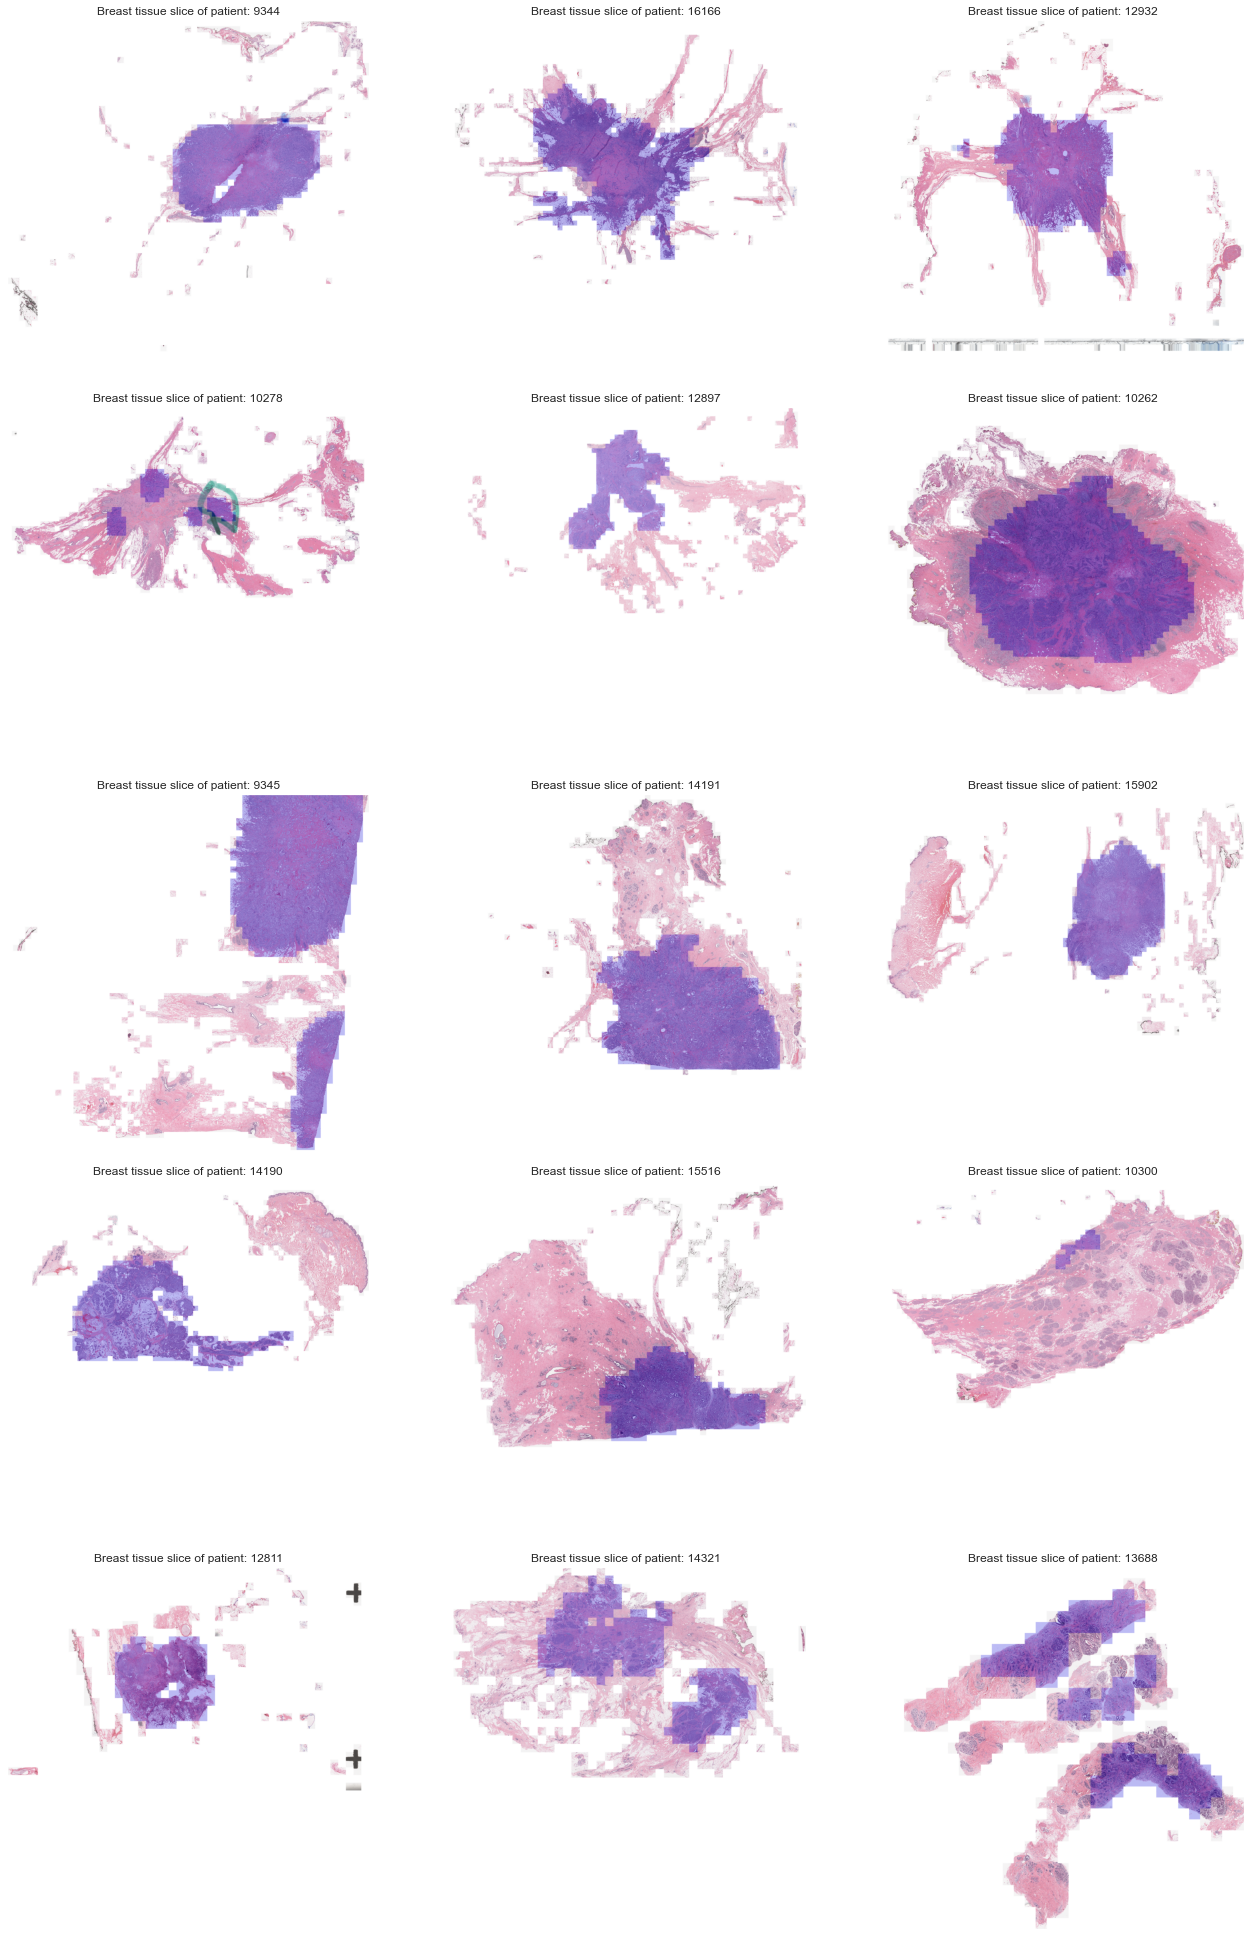

In [67]:
fig, ax = plt.subplots(n_rows,n_cols,figsize=(20, 27))

for row in range(n_rows):
    for col in range(n_cols):
        p_id = patient_ids[col + n_cols*row]
        
        img = visualise_breast_tissue(p_id, pred = True)
        ax[row,col].grid(False)
        ax[row,col].set_xticks([])
        ax[row,col].set_yticks([])
        ax[row,col].set_title("Breast tissue slice of patient: " + p_id)        
        ax[row,col].imshow(img)

- En comparant les résultats des deux blocs, il semble que les tissus plus foncés et plus violets ont plus de chances d'être cancéreux que ceux de couleur rose.
- Mais comme on peut le voir, ce n'est pas toujours le cas. Nous devons donc nous demander si les patchs de tissus violets ont plus de canaux mammaires que les roses. Si cela est vrai, nous devons être prudents. Notre modèle pourrait commencer à apprendre que les canaux mammaires sont toujours liés au cancer !